<a href="https://colab.research.google.com/github/Kim-JHyun/RPA_Web/blob/main/13_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B3%BC%EC%A0%9C_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 설명
- 가상 쇼핑몰 고객 주문 데이터 파악하기
- 온라인 쇼핑몰 사이트의 2010/12 - 2011/12간의 주문 기록 데이터
- 데이터 출처: [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Online+Retail#)

## 데이터 분석 목표

 - 매출 분석 : 월별, 요일별, 시간별, 국가별
 - 우수고객 선별(구매건수, 구매 비용 기준)

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

In [ ]:
retail = pd.read_csv('OnlineRetail.csv')

In [ ]:
retail.head()
# InvoiceNo: 주문 번호, StockCode: 상품 코드

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Description, CustomerID 결측치 있음

In [ ]:
retail.describe()
# 수량과 가격에 음수 값이 있음

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 1) 결측치 처리

In [ ]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### CustomerID는 없으면 분석이 안되니 결측치를 삭제하고, Description은 유지

In [ ]:
retail.dropna(subset=['CustomerID'], axis=0, inplace=True) # axis=0은 행기준
#inplace=True' 옵션은 변경 사항이 DataFrame에 직접 적용

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 2) 수량 음수 값 처리

In [ ]:
len(retail[retail['Quantity'] < 0])

8905

In [ ]:
retail = retail[retail['Quantity'] > 0]

len(retail)

397924

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### 3) 파생변수 추가
 - 총 지출 비용(Total_Price) = Quantity * UnitPrice

In [ ]:
retail['Total_Price'] = retail['UnitPrice'] * retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


#### 4) 날짜 타입 데이터 변환

In [ ]:
# retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
# infer_datetime_format=True 옵션은 날짜타입 포멧을 추정해서 가져옴

In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [ ]:
retail['InvoiceDate_m'] = retail['InvoiceDate'].dt.to_period(freq='M') #연월을 같이 추출

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Total_Price  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,InvoiceDate_m
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


#### 5) 매출 분석

In [ ]:
# 전체 매출
total_revenue = retail['Total_Price'].sum()
total_revenue

8911407.904

In [ ]:
# 국가별 매출 : 상위 5개국
rev_by_countries = retail.groupby('Country').sum()['Total_Price'].sort_values(ascending=False)
rev_by_countries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [ ]:
# 국가별 매출 : 상위 5개국
rev_by_countries5 = retail.groupby('Country').sum()['Total_Price'].sort_values(ascending=False)[:5]
rev_by_countries5

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: Total_Price, dtype: float64

<AxesSubplot:xlabel='Country'>

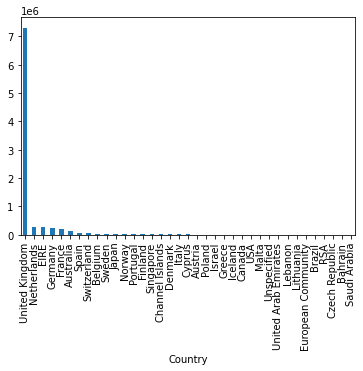

In [ ]:
rev_by_countries.plot(kind = 'bar')

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Netherlands'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Sweden'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Finland'),
 Text(14, 0, 'Singapore'),
 Text(15, 0, 'Channel Islands'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Poland'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Greece'),
 Text(23, 0, 'Iceland'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Unspecified'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Lebanon'),
 Text(30, 0, 'Lithuania'),
 Text(31, 0, 'European Community'),
 Text(32, 0, 'Brazil'),
 Text(33, 0, 'RSA'),
 Text(34, 0, 'Czech Republic'),
 Text(35, 0, 'Bahrain'),
 Text(36, 0, 'Saudi Arabia')]

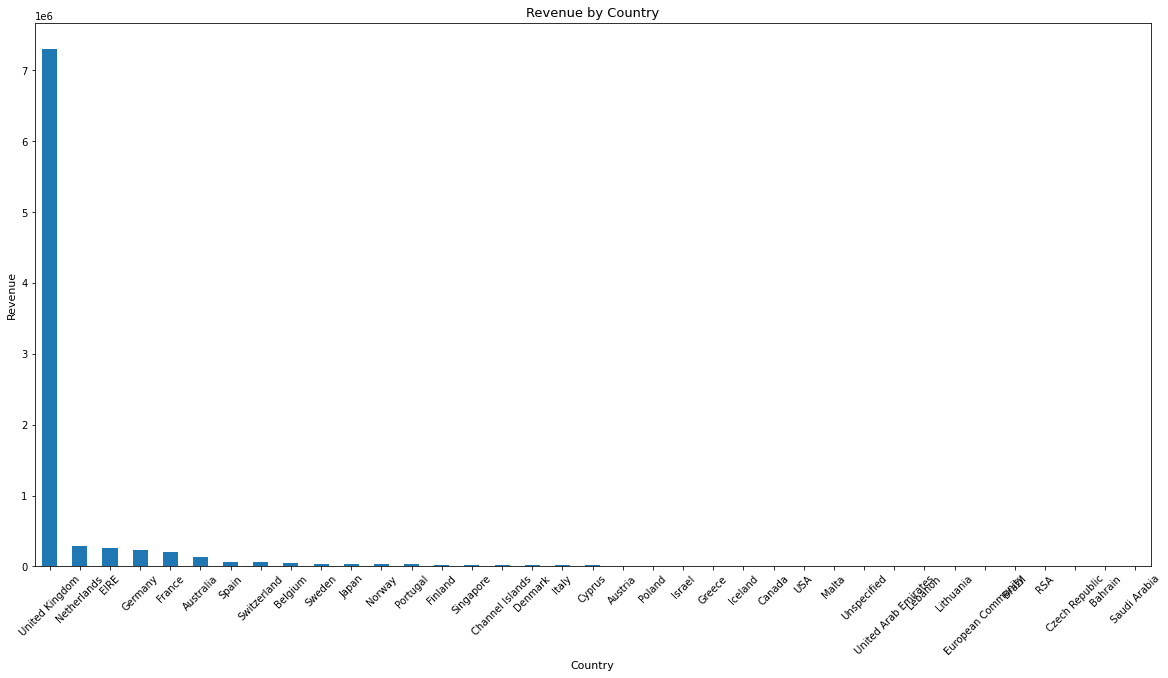

In [ ]:
plot = rev_by_countries.plot(kind='bar', figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

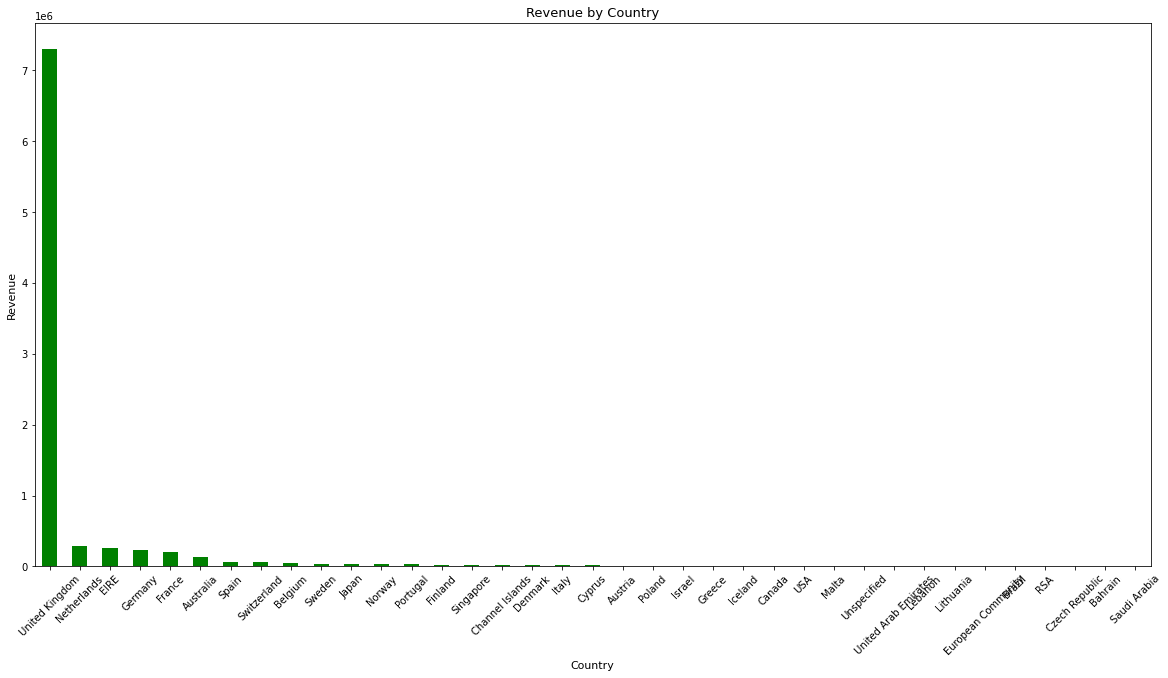

In [ ]:
# 막대 그래프 그리기 함수 정의
def plot_bar(df, xlabel, ylabel, title, color= 'g', figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by Country')

In [ ]:
# 월별 매출 분석
rev_by_month = retail.set_index('InvoiceDate').groupby('InvoiceDate_m').sum()['Total_Price']
rev_by_month

InvoiceDate_m
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: Total_Price, dtype: float64

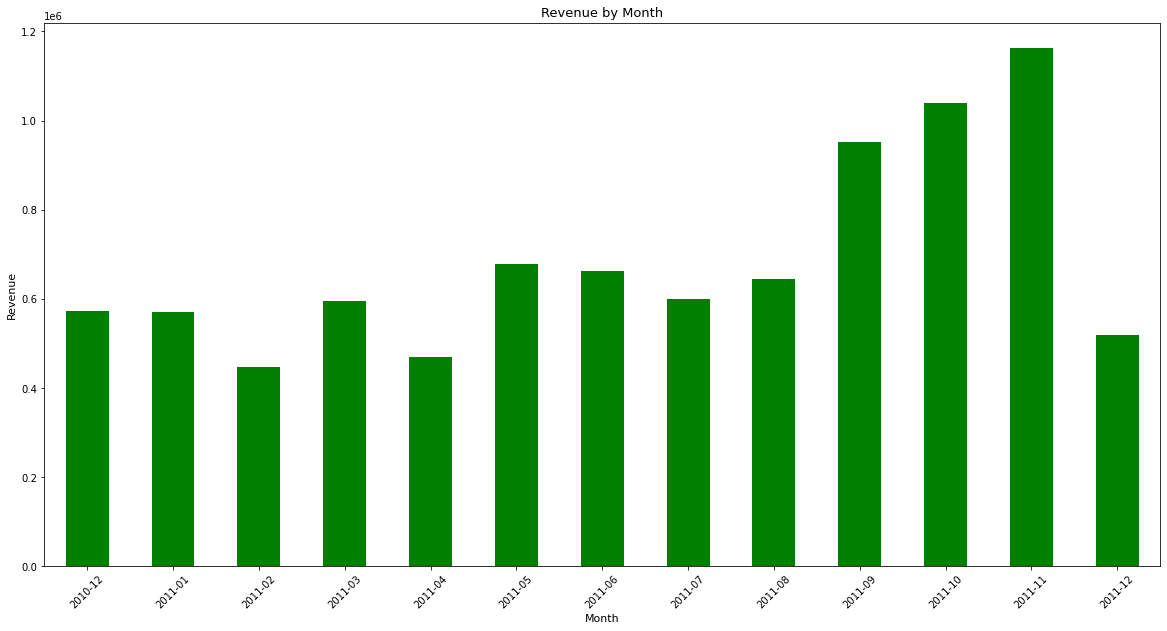

In [ ]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

In [ ]:
# 요일별 매출 분석

rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['Total_Price']
rev_by_dow
# date.dayofweek : 요일 추출
# 0: 월요일

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: Total_Price, dtype: float64

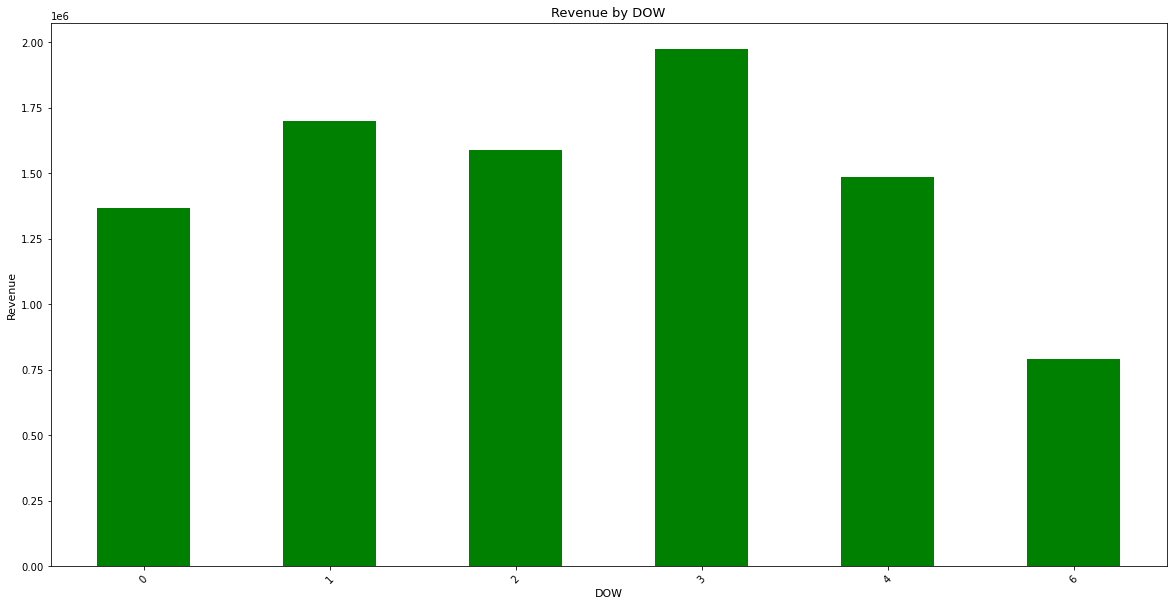

In [ ]:
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

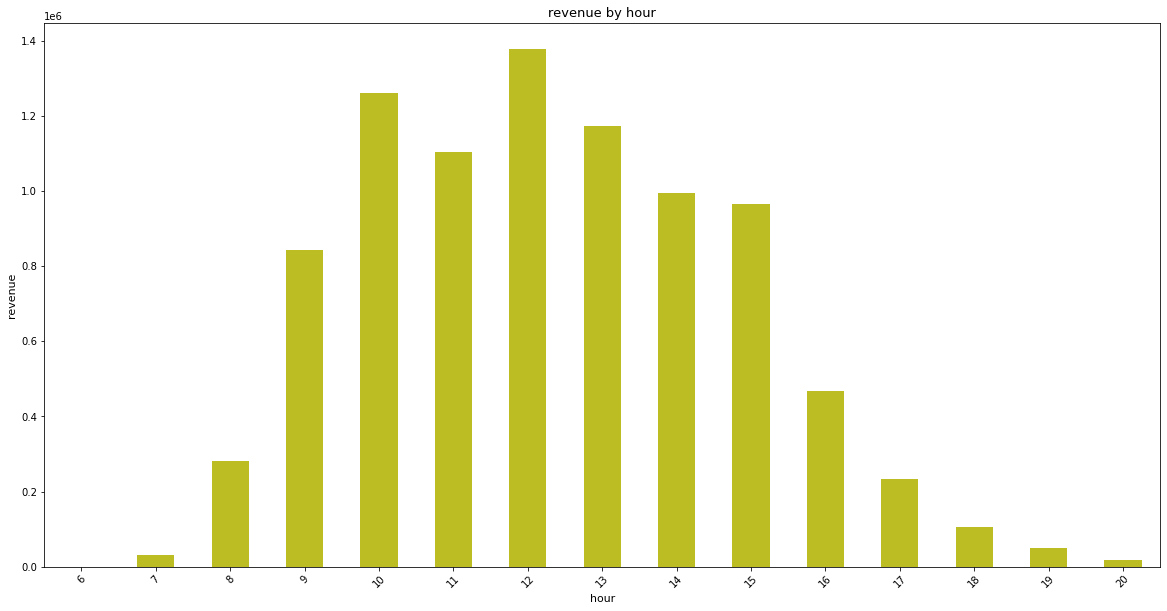

In [ ]:
# 시간대별 매출
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['Total_Price']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

#### 6) Top10 판매 제품

In [ ]:
top_10 = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_10

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [ ]:
top_revenue = retail.groupby('StockCode').sum()['Total_Price'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: Total_Price, dtype: float64

#### 7) 우수 고객 확인

In [ ]:
# 구매 횟수 기준
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)


CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15940.0       1
15823.0       1
15802.0       1
15753.0       1
12346.0       1
Name: Quantity, Length: 4339, dtype: int64

In [ ]:
# 구매 금액 기준
retail.groupby('CustomerID').sum()['Total_Price'].sort_values(ascending=False)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
             ...    
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
13256.0         0.00
Name: Total_Price, Length: 4339, dtype: float64